In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

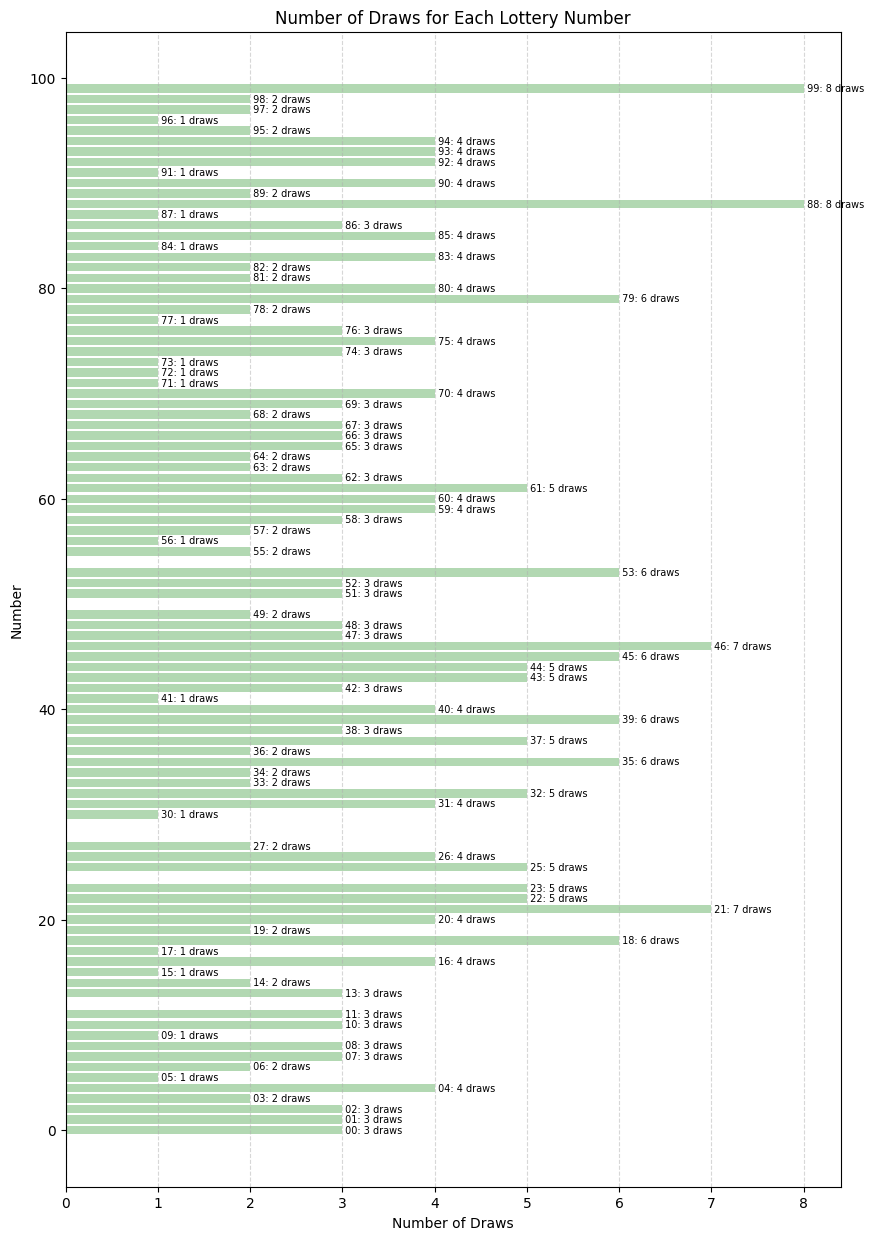

In [8]:
# ---
# Group No. 1
# 1. นาย พศิน บุญชู 6410450532
# 2. นาย ณัฐภัทร ภารกุล 6410451644
# 3. นาย นิธิภัทร เบญจม์ภัทร 6410451725
# ---

group = 1 # กลุ่มที่ 1
problem = 7 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# เปลี่ยนชื่อหัวตารางเป็น number เพื่อง่ายต่อการดึงข้อมูล
data.columns = ['number']
# ลบ rows ที่เป็นวันที่ออก
data = data.drop(range(1,len(data),2))
# นับเลข ที่ 2 ตัวที่ โดย เก็บไว้ใน columns ที่ชื่อว่า count
data= data.value_counts().reset_index(name="count")
# เรียง เลข  2 ตัว จากน้อยไปมาก
data = data.sort_values(by='number', ascending=True)
# แปลงเลขท้าย 2 ตัวจาก str เป็น ตัวเลข
data['number'] = pd.to_numeric(data['number'], errors='coerce')


#สร้างกราฟ
# กำหนดขนาดกราฟ
plt.figure(figsize=(10,15))
# สร้าง horizontal bar chart
plt.barh(data["number"], data["count"], color="green",alpha=0.3)
# กำหนด แกน y
plt.yticks(range(0,101,20))
# กำหนด แกน x
plt.xticks(range(0,(data['count'].max())+1,1))

# สร้าง ข้อความแสดงบนแท่งกราฟ
  # แปลง ข้อมูลใน data['count] เป็น list
count_list = data['count'].tolist()
# กำหนด index ในการ เลือก ข้อมูลใน list
round = 0
for i in data['number']:
  if i >=10 : # ถ้าแท่งกราฟอยู่ใน แกน y ที่ค่าตั้งแต่ 10 ขึ้นไป ไม่ต้องใส่ 0
    plt.text(count_list[round], i, f" {i}: {count_list[round]} draws", ha='left', va='center', color='black', fontsize=7)
  else: # ถ้าแท่งกราฟอยู่ใน แกน y ที่ค่าน้อยกว่า 10 ใส่ 0 หน้าตัวตัวเลข
    plt.text(count_list[round], i, f" 0{i}: {count_list[round]} draws", ha='left', va='center', color='black', fontsize=7)
  round+=1
# กำหนดชื่อกราฟ
plt.xlabel('Number of Draws')
plt.ylabel('Number')
plt.title('Number of Draws for Each Lottery Number')
# สร้างเส้น ตามแนวแกน x
plt.grid(True, axis='x',alpha=0.5,linestyle='--')


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()